<a href="https://colab.research.google.com/github/HowardHNguyen/Machine-Learning-Deep-Learning/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Read the Iris Data
iris_data = pd.read_csv("/content/drive/MyDrive/_Python/Machine-Learning-Algorithms/Section 4/Dataset/Dataset/iris_data.csv")
print (iris_data.head())

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [4]:
# Get the Summary Statistics for Iris Data
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# Creating the Feature Space for Iris data
X_colnames_u = [cols for cols in iris_data.columns.tolist() if cols in [
'sepal_length',
'sepal_width',
'petal_length',
'petal_width'
]]
X_colnames_u

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [6]:
Y_iris_data = iris_data['class']
X_iris_data = iris_data[X_colnames_u]

In [7]:
print(X_iris_data.head())
print(Y_iris_data.shape)
print(X_iris_data.shape)

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
(150,)
(150, 4)


In [8]:
# Scaling of Data
from sklearn.preprocessing import StandardScaler
SC = StandardScaler(copy=False, with_mean=True, with_std=True)
X = pd.DataFrame(SC.fit_transform(X_iris_data), columns = X_colnames_u)

In [9]:
X.shape

(150, 4)

In [10]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [11]:
# Metrics of evaluating the optimal number of clusters
# Elbow Method,
# Variance Explained,
# Silhouette Score
K = range(1,10)
KMS = [KMeans(n_clusters=k).fit(X) for k in K]
centroids = [k.cluster_centers_ for k in KMS]
DKM = [cdist(X, cent, 'euclidean') for cent in centroids]
dist = [np.min(D, axis=1) for D in DKM]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 1.0, 'Elbow for KMeans clustering')

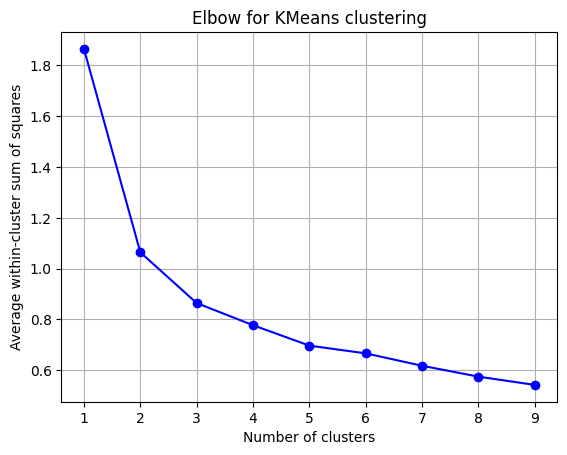

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'bo-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 1.0, 'Variance explained by KMeans clustering')

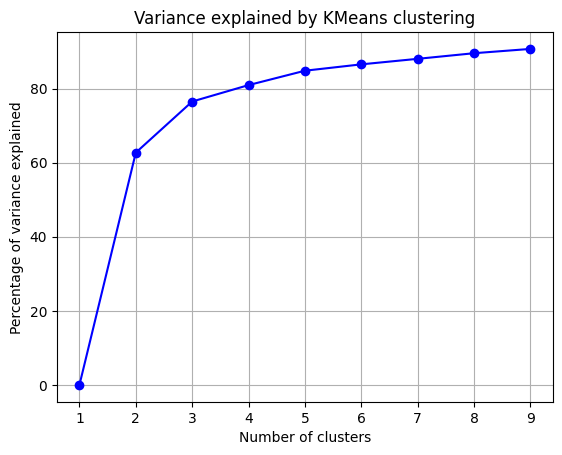

In [13]:
# Variance Explained
# matrix, x_cols = matrix_from_df(data_train)
# X = matrix[x_cols]
K = range(1,10)
KM = [KMeans(n_clusters=k).fit(X) for k in K]
centroids = [k.cluster_centers_ for k in KM]
DKM = [cdist(X, cent, 'euclidean') for cent in centroids]
dist = [np.min(D,axis=1) for D in DKM]
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(X)**2)/X.shape[0]
bss = tss-wcss
kIdx = 10-1
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, bss/tss*100, 'bo-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Variance explained by KMeans clustering')

In [14]:
# Getting the Silhoutte Score for different clusters solution
for k in range(2,10):
    k_means_fitk = KMeans(n_clusters=k,max_iter=100)
    k_means_fitk.fit(X)
    print ("For K value = ",k,", Silhouette-score: %0.5f" % silhouette_score(X, k_means_fitk.labels_, metric='euclidean'))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For K value =  2 , Silhouette-score: 0.58018
For K value =  3 , Silhouette-score: 0.45897
For K value =  4 , Silhouette-score: 0.38876
For K value =  5 , Silhouette-score: 0.34870


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For K value =  6 , Silhouette-score: 0.32904
For K value =  7 , Silhouette-score: 0.32871
For K value =  8 , Silhouette-score: 0.31838


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For K value =  9 , Silhouette-score: 0.34454


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

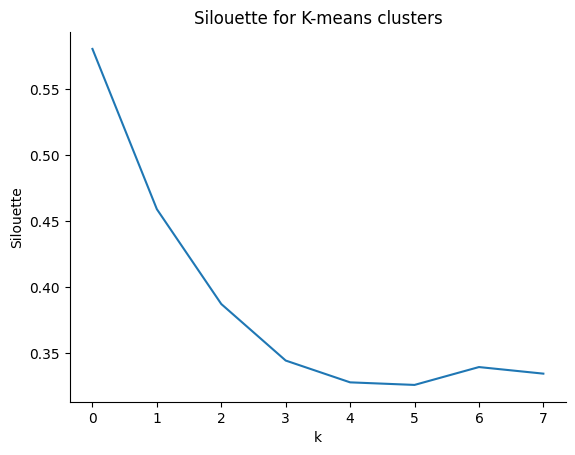

In [15]:
# Getting the Silhouette Score for the Optimal Number of Clusters
# Plotting Silhouette Score Plot from the Data Matrix
import seaborn as sns
s = []
for n_cluster in range(2,10):
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    s.append(silhouette_score(X, labels, metric='euclidean'))


plt.plot(s)
plt.ylabel("Silouette")
plt.xlabel("k")
plt.title("Silouette for K-means clusters")
sns.despine()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-16-9f0cd6882ade>:23: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c=labels.astype(np.float), edgecolor="k", s=50)


Text(0.5, 1.0, 'K Means')

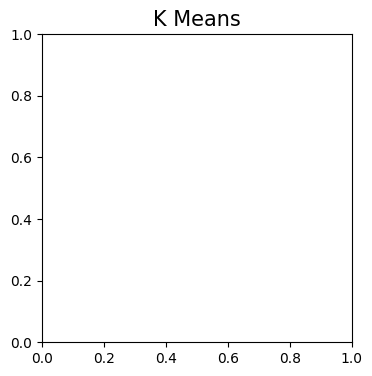

In [16]:
# Visualising the Clusters
#KMeans
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline
from sklearn import datasets
#Iris Dataset
iris = datasets.load_iris()
X = iris.data
#KMeans
km = KMeans(n_clusters=3)
km.fit(X)
km.predict(X)
labels = km.labels_
#Plotting
fig = plt.figure(1, figsize=(4,4))
ax = Axes3D(fig, rect=[0, 0, 0.99, 1], elev=48, azim=140)
ax.scatter(X[:, 3], X[:, 0], X[:, 2],
          c=labels.astype(np.float), edgecolor="k", s=50)
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
plt.title("K Means", fontsize=15)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


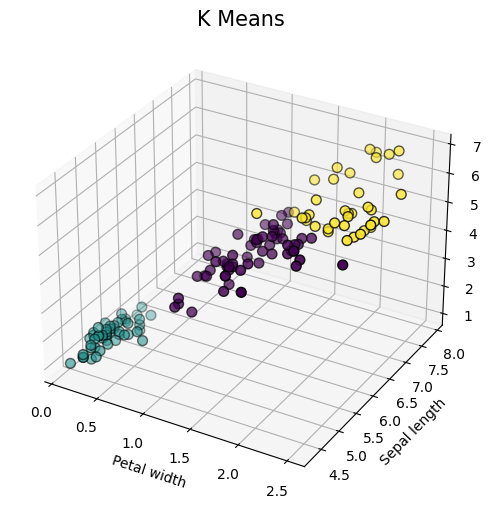

In [17]:
# Import necessary libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data

# Fit KMeans model
km = KMeans(n_clusters=3)
km.fit(X)
labels = km.labels_

# Plotting in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(float), edgecolor="k", s=50)

# Set labels
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")

# Set title
plt.title("K Means", fontsize=15)

# Show the plot
plt.show()

In [18]:
cluster = KMeans(n_clusters = 3, random_state = 2)
iris_data['cluster'] = cluster.fit_predict(X)
iris_data.cluster.value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1    62
0    50
2    38
Name: cluster, dtype: int64

In [20]:
iris_data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
class            object
cluster           int32
dtype: object

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['x', 'y'])

In [22]:
principalDf.head()

,x,y
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


In [23]:
iris_data_cluster = pd.concat([principalDf, iris_data], axis = 1)

In [24]:
iris_data_cluster.head()

,x,y,sepal_length,sepal_width,petal_length,petal_width,class,cluster
0,-2.684126,0.319397,5.1,3.5,1.4,0.2,Iris-setosa,0
1,-2.714142,-0.177001,4.9,3.0,1.4,0.2,Iris-setosa,0
2,-2.888991,-0.144949,4.7,3.2,1.3,0.2,Iris-setosa,0
3,-2.745343,-0.318299,4.6,3.1,1.5,0.2,Iris-setosa,0
4,-2.728717,0.326755,5.0,3.6,1.4,0.2,Iris-setosa,0


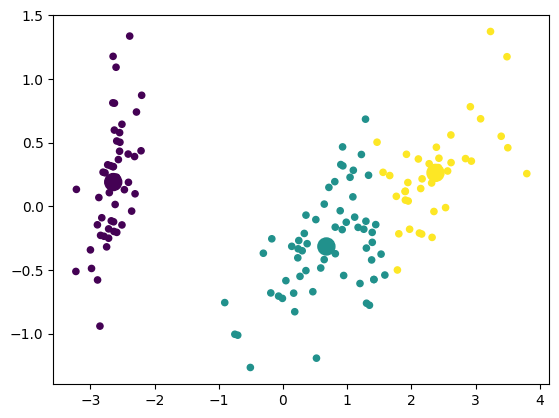

In [25]:
# Plotting Clusters in a Two-Dimensional Space
cluster_centers = pca.transform(cluster.cluster_centers_)
cluster_centers = pd.DataFrame(cluster_centers, columns=['x', 'y'])
cluster_centers['cluster'] = range(0, len(cluster_centers))
plt.scatter(iris_data_cluster['x'], iris_data_cluster['y'], s = 20,
c=iris_data_cluster['cluster'])
plt.scatter(cluster_centers['x'], cluster_centers['y'], s = 150, c=cluster_centers['cluster'])

In [26]:
# Merging Matrix into the Original Data Frame
iris_data_cluster.columns.name = None
iris_data_new = pd.concat([iris_data_cluster, iris_data], axis=1, sort=False)
# iris_data = iris_data.concate(customer_clusters, on='key_1')
iris_data_new.head()
# Remove Duplicate columns
iris_data_new = iris_data_new.loc[:,~iris_data_new.columns.duplicated()]
iris_data_new.head()

,x,y,sepal_length,sepal_width,petal_length,petal_width,class,cluster
0,-2.684126,0.319397,5.1,3.5,1.4,0.2,Iris-setosa,0
1,-2.714142,-0.177001,4.9,3.0,1.4,0.2,Iris-setosa,0
2,-2.888991,-0.144949,4.7,3.2,1.3,0.2,Iris-setosa,0
3,-2.745343,-0.318299,4.6,3.1,1.5,0.2,Iris-setosa,0
4,-2.728717,0.326755,5.0,3.6,1.4,0.2,Iris-setosa,0


In [27]:
iris_data_new.cluster.value_counts()

1    62
0    50
2    38
Name: cluster, dtype: int64

In [28]:
# Cluster Summary
summary_KMeans =pd.DataFrame(iris_data_new.groupby(['cluster']).mean().T)

<ipython-input-28-1a8102a16d57>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  summary_KMeans =pd.DataFrame(iris_data_new.groupby(['cluster']).mean().T)


In [29]:
summary_KMeans

cluster,0,1,2
x,-2.642415,0.675662,2.374466
y,0.190885,-0.315205,0.263117
sepal_length,5.006000,5.901613,6.850000
sepal_width,3.418000,2.748387,3.073684
petal_length,1.464000,4.393548,5.742105
petal_width,0.244000,1.433871,2.071053


# Using Gaussian Mixture Model to arrive at the Clusters

In [30]:
# Scaling of Data
from sklearn.preprocessing import StandardScaler
SC = StandardScaler(copy=False, with_mean=True, with_std=True)
X_new = pd.DataFrame(SC.fit_transform(X_iris_data), columns = X_colnames_u)

In [31]:
X_new.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [32]:
X_new.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [33]:
def plot_results(X, Y_u, means, covariances, index, title):
    color_iter = itertools.cycle(['b', 'g', 'red', 'm', 'y', 'navy', 'c','cornflowerblue', 'gold','darkorange'])
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = np.linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / np.linalg.norm(w[0])
        if not np.any(Y_u == i):
            continue
        plt.scatter(X[Y_u == i, 0], X[Y_u == i, 1], .9, color=color)
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 190. + angle,
        color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)
    plt.xlim(0.0, 0.2)
    plt.ylim(-0.2, 1.4)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)

In [40]:
# Determining the Optimal Covariance Type and Components for Model and Plotting It
# matrix, x_cols = matrix_from_df(data_train)
import itertools
from sklearn import mixture
#X  = X_new[X_colnames_u].as_matrix()
X  = X_new[X_colnames_u].values
model_stats = []
n_components_range = range(3,5)
cv_types = ['spherical', 'tied', 'full']
# cv_types = [ 'full']

for cv_type in cv_types:
    for n_components in n_components_range:

        gmm = mixture.GaussianMixture(n_components=n_components,
                                     covariance_type=cv_type,
                                     random_state=1)
        gmm.fit(X)
        model_stats.append({'name':'%s_%d'%(cv_type, n_components),'model':gmm, 'bic':gmm.bic(X)})
bic = np.array([m_type['bic'] for m_type in model_stats])
best_gmm = model_stats[bic.argmax()]
clf = best_gmm['model']
color_iter = itertools.cycle(['red', 'green', 'blue'])
bars = []

<ipython-input-33-f8267adedff2>:14: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ell = mpl.patches.Ellipse(mean, v[0], v[1], 190. + angle,


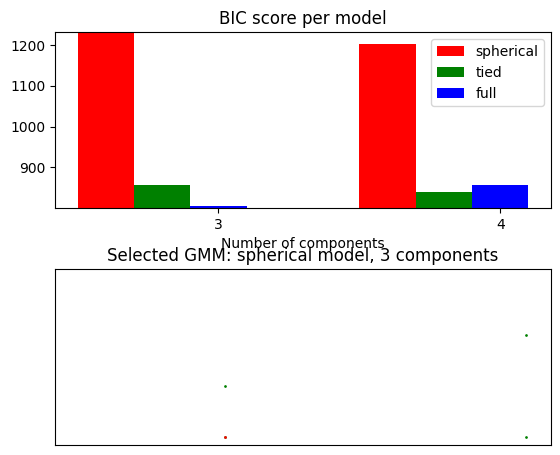

In [41]:
# Plot the BIC scores
import matplotlib as mpl
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

labels = clf.predict(X)
plot_results(X, labels, gmm.means_, gmm.covariances_, 1,'Gaussian Mixture-%s'%gmm.converged_)
plt.xticks(())
plt.yticks(())
plt.title('Selected GMM: %s model, %s components'%(best_gmm['name'].
split('_')[0], best_gmm['name'].split('_')[1]))
plt.subplots_adjust(hspace=.35, bottom=.02)
plt.show()

<ipython-input-33-f8267adedff2>:14: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ell = mpl.patches.Ellipse(mean, v[0], v[1], 190. + angle,


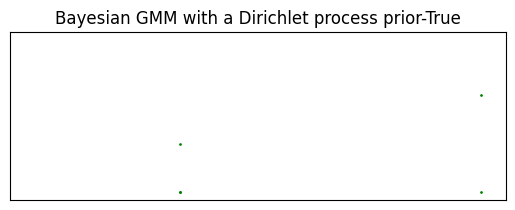

In [42]:
# X_new = X_new.reset_index(drop=True)
X  = X_new[X_colnames_u].values
bmm = mixture.BayesianGaussianMixture(n_components=3, covariance_type='full',random_state=1).fit(X)
labels = bmm.predict(X)
plot_results(X, labels, bmm.means_, bmm.covariances_, 1,'Bayesian GMM with a Dirichlet process prior-%s'%bmm.converged_)
plt.show()

In [43]:
# Display Frequency of Objects in Each Cluster
iris_data['cluster_BMM'] = labels
iris_data.cluster_BMM.value_counts()

1    74
0    50
2    26
Name: cluster_BMM, dtype: int64

In [44]:
# Cluster Summary
summary =pd.DataFrame(iris_data.groupby(['cluster_BMM']).mean().T)

<ipython-input-44-06392f494a37>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  summary =pd.DataFrame(iris_data.groupby(['cluster_BMM']).mean().T)


In [45]:
summary

cluster_BMM,0,1,2
sepal_length,5.006,6.336486,6.050000
sepal_width,3.418,2.941892,2.673077
petal_length,1.464,5.164865,4.169231
petal_width,0.244,1.821622,1.261538
cluster,0.000,1.500000,1.038462


# Application of Birch Algorithm to find the clusters for Iris Dataset

In [46]:
from sklearn.cluster import Birch
cluster_birch = Birch(n_clusters=3)
iris_data['cluster_birch'] = cluster_birch.fit_predict(X)
iris_data.cluster_birch.value_counts()

0    71
1    49
2    30
Name: cluster_birch, dtype: int64

In [47]:
labels_birch = cluster_birch.predict(X)

In [48]:
# Display Frequency of Objects in Each Cluster
iris_data['cluster_birch'] = labels_birch
iris_data.cluster_birch.value_counts()

0    71
1    49
2    30
Name: cluster_birch, dtype: int64

In [49]:
# Cluster Summary
summary_birch =pd.DataFrame(iris_data.groupby(['cluster_birch']).mean().T)

<ipython-input-49-d13d4bae41f8>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  summary_birch =pd.DataFrame(iris_data.groupby(['cluster_birch']).mean().T)


In [50]:
summary_birch

cluster_birch,0,1,2
sepal_length,5.947887,5.016327,6.946667
sepal_width,2.747887,3.440816,3.146667
petal_length,4.466197,1.467347,5.826667
petal_width,1.459155,0.242857,2.143333
cluster,1.098592,0.000000,2.000000
cluster_BMM,1.352113,0.000000,1.000000
